In [52]:
import requests
import shapely.geometry as geom


In [39]:
url = "http://loc.geopunt.be/geolocation/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Sint-Antoniusplein 19, 2910 Essen"

response = requests.get(url)

# Here the response format is a json file, it is used as a dictionary
print(response.json())

{'SuggestionResult': ['Sint-Antoniusplein 19, 2910 Essen']}


In [74]:
# url = "http://loc.geopunt.be/geolocation/suggestion?q=Kouter 26"
# url = "http://loc.geopunt.be/geolocation/v4/suggestion?q=Kouter 26, 9000 Gent"
# # url = "http://loc.geopunt.be/geolocation/v4/suggestion?trambergstraat%201"
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"

url = f"https://loc.geopunt.be/v4/Location?q={address}"


response = requests.get(url)
response = response.json()


# Here the response format is a json file, it is used as a dictionary
print(response)


#GET v4/Suggestion?q={q}&c={c}
 

{'LocationResult': [{'Municipality': 'Essen', 'Zipcode': '2910', 'Thoroughfarename': 'Sint-Antoniusplein', 'Housenumber': '19', 'ID': 1530410, 'FormattedAddress': 'Sint-Antoniusplein 19, 2910 Essen', 'Location': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'LocationType': 'crab_huisnummer_afgeleidVanGebouw', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'UpperRight': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}}}]}


In [78]:
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"
# address = "Limburgstraat 14, 9000 Gent"

req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
info = {'address' : address, 
        'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
        'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
        'street' : req['LocationResult'][0]['Thoroughfarename'],
        'house_number' : req['LocationResult'][0]['Housenumber'], 
        'postcode': req['LocationResult'][0]['Zipcode'], 
        'municipality' : req['LocationResult'][0]['Municipality']}
    
detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch",
                      params={"postcode": info['postcode'], 
                      "straatnaam": info['street'],
                      "huisnummer": info['house_number']}).json()
building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = requests.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]


{'address': 'Sint-Antoniusplein 19, 2910 Essen', 'x_value': 155954.89, 'y_value': 239115.28, 'street': 'Sint-Antoniusplein', 'house_number': '19', 'postcode': '2910', 'municipality': 'Essen', 'polygon': [{'coordinates': [[[155964.90004737675, 239116.14077588543], [155962.14139137417, 239123.20522388816], [155955.17511937022, 239120.49066388607], [155956.10887937248, 239118.19888788462], [155951.22401537, 239116.56688788533], [155952.00340736657, 239114.54832788184], [155941.2950553596, 239110.34160787985], [155942.54151935875, 239107.34026387706], [155948.70471936464, 239109.76618387923], [155964.90004737675, 239116.14077588543]]], 'type': 'Polygon'}]}
{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/1681303', 'naamruimte': 'https://data.vlaanderen.be/id/adres', 'objectId': '1681303', 'versieId': '2011-04-29T15:04:42+02:00'}, 'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1681303', 'gemeente': {'objectId': '11016', 'detail': 'https://api.

In [81]:
info

{'address': 'Sint-Antoniusplein 19, 2910 Essen',
 'x_value': 155954.89,
 'y_value': 239115.28,
 'street': 'Sint-Antoniusplein',
 'house_number': '19',
 'postcode': '2910',
 'municipality': 'Essen',
 'polygon': [{'coordinates': [[[155964.90004737675, 239116.14077588543],
     [155962.14139137417, 239123.20522388816],
     [155955.17511937022, 239120.49066388607],
     [155956.10887937248, 239118.19888788462],
     [155951.22401537, 239116.56688788533],
     [155952.00340736657, 239114.54832788184],
     [155941.2950553596, 239110.34160787985],
     [155942.54151935875, 239107.34026387706],
     [155948.70471936464, 239109.76618387923],
     [155964.90004737675, 239116.14077588543]]],
   'type': 'Polygon'}]}

In [79]:
# Plot polygon
poly_building = info['polygon'][0]['coordinates'][0]
poly_building

[[155964.90004737675, 239116.14077588543],
 [155962.14139137417, 239123.20522388816],
 [155955.17511937022, 239120.49066388607],
 [155956.10887937248, 239118.19888788462],
 [155951.22401537, 239116.56688788533],
 [155952.00340736657, 239114.54832788184],
 [155941.2950553596, 239110.34160787985],
 [155942.54151935875, 239107.34026387706],
 [155948.70471936464, 239109.76618387923],
 [155964.90004737675, 239116.14077588543]]

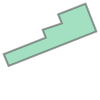

In [80]:
geom.Polygon(poly_building)